### Фитирование (архив)
Здесь хранятся процедуры фитирования, не попавшие в основной олтчёт.

In [2]:
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
#Получение данных гистограммы

data=[]
with open('Data_end', 'r') as file:
    arr=file.readlines()
    for line in arr[10:]:
        data.append(int(line))
    # arrx, arrx, arrz = arr[1].split()
    # H = float(arrz)
    # arrx, arrx, arrz = arr[2].split()
    # R = float(arrz)
    # arrx, arrx, arrz = arr[3].split()
    # a = float(arrz)
    # arrx, arrx, arrz = arr[4].split()
    # L = float(arrz)
    # arrx, arrx, arrz = arr[5].split()
    # theta = float(arrz)
    arrx, arrx, arrx, arry, arrz = arr[6].split()
    x_max = float(arry)
    x_min = float(arrz)
    arrx, arrx, arrz = arr[7].split()
    err = float(arrz)

# data = np.loadtxt('Data_end', skiprows = 1)
# x_min =
# err =

In [ ]:
#Обработка (добавление длин)
l=[]
for i in range(len(data)):
    l.append(x_min+ i*err)

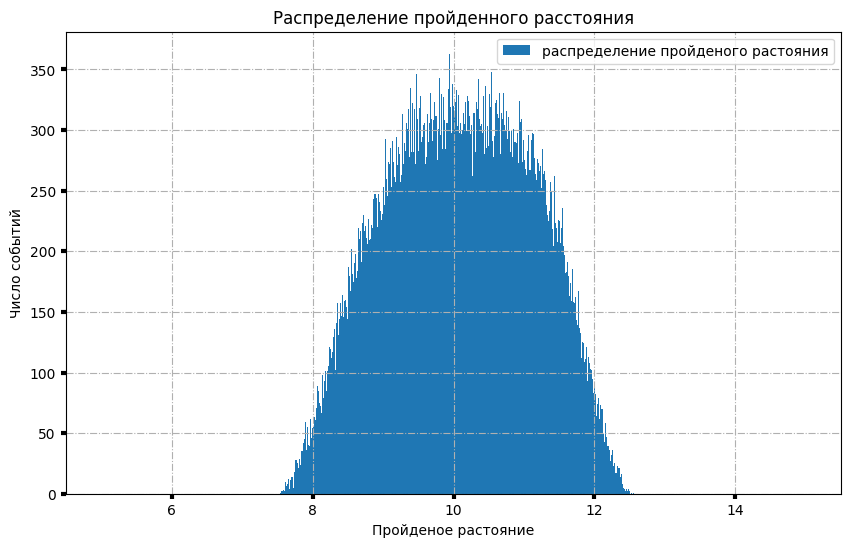

In [ ]:
#Рисование гистограммы и другое
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Распределение пройденного расстояния')
ax.set_xlabel('Пройденое растояние')
ax.set_ylabel('Число событий')
ax.grid(True, linestyle='-.')
ax.tick_params(labelsize='medium', width=3)

ax.bar(l, data, linewidth = 1., width = err, label = "распределение пройденого растояния")

ax.legend()
pyplot.show()

## Фитирование распределения $F(l)$

Воспользуемся пакетами scipy.optimize для фитирования полученной гистограммы.

In [ ]:
#Фитирование (библиотеки)
from scipy.optimize import curve_fit
from scipy.special import  erf
from math import exp

In [ ]:
# Границы фитирования
flag = 0;
for i in range(len(data)):
  if flag == 0 and data[i]>0:
    i_min = i
    flag = 1
  if flag == 1 and data[i] ==0 and i<(i_min+30):
    i_min = i
  if flag == 1 and data[i] ==0 and i>(i_min+30):
    i_max=i
    break
print(i_min, i_max)

254 751


### Гауссов пик и ему подобные
Так как внешний вид распределерия схожен с нормальным расспределением, то попробуем использовать гаусовы и ему подобные распределения

In [ ]:
#Пробная функция - квадратичная
def parab(x, a, b, c):
    return c-a*np.power(np.abs(x-b), 2)
args_p, covar_p = curve_fit(parab, l[i_min+100:i_max-100], data[i_min+100:i_max-100], [1.,10.0, 400.0])
perr = np.sqrt(np.diag(covar_p))
print("Результаты фитирования параболой: ", args_p, " и их ошибка", perr)

Результаты фитирования параболой:  [ 50.62631549  10.15948958 319.14826557]  и их ошибка [1.59454432 0.01285058 1.55889193]


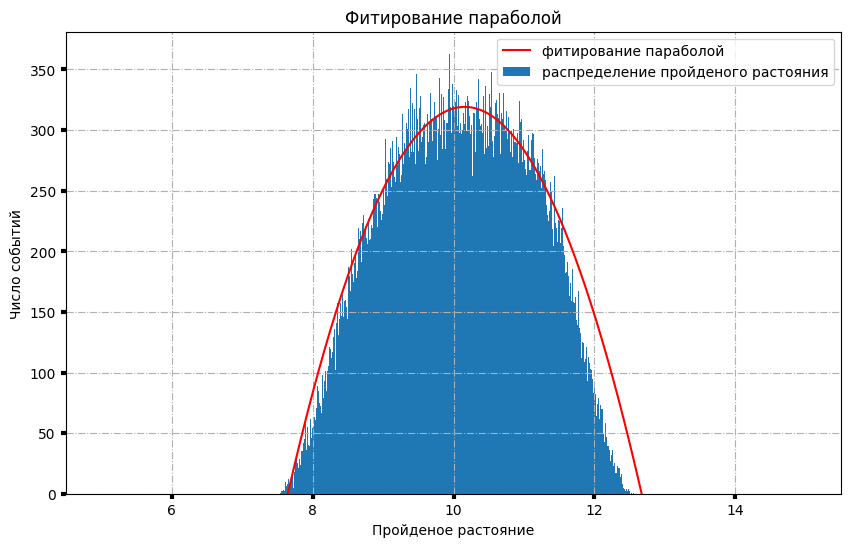

In [ ]:
x = []
y = []
for i in range(len(l)):
    if parab(l[i], args_p[0], args_p[1], args_p[2]) > 0:
      x.append(l[i])
      y.append(parab(l[i], args_p[0], args_p[1], args_p[2]))

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Фитирование параболой')
ax.set_xlabel('Пройденое растояние')
ax.set_ylabel('Число событий')
ax.grid(True, linestyle='-.')
ax.tick_params(labelsize='medium', width=3)

ax.bar(l, data, linewidth = 1., width = err, label = "распределение пройденого растояния")
ax.plot(x, y, color='r', label = "фитирование параболой")
ax.legend()
pyplot.show()

In [ ]:
#Фитирование гаусовым пиком
def gauss(x, a, b, c, d):
    return a*np.exp(-(x-b)**2 /c)+d
args, covar = curve_fit(gauss, l[i_min:i_max], data[i_min:i_max], [300000.0,11.0, 100.0,0.0])
perr = np.sqrt(np.diag(covar))
args, perr

# Подсчёт хи квадрата
chisq=0
for i in range(i_min, i_max):
    if data[i]>0:
        chisq += (data[i] - gauss(l[i], *args))**2/ data[i]
    else:
        chisq += (data[i] - gauss(l[i], *args))**2
print("Результаты фитирования гауссом: ", args_p, " и их ошибка", perr)
print("Хи квадрат: ",chisq)
print("Уделёный на число степеней свобод: ", chisq/(i_max - i_min - 3))

Результаты фитирования гауссом:  [ 50.62631549  10.15948958 319.14826557]  и их ошибка [2.29062770e+02 5.46033259e-03 3.95512369e+00 2.29992210e+02]
Хи квадрат:  7084.138777589329
Уделёный на число степеней свобод:  14.340361897954107


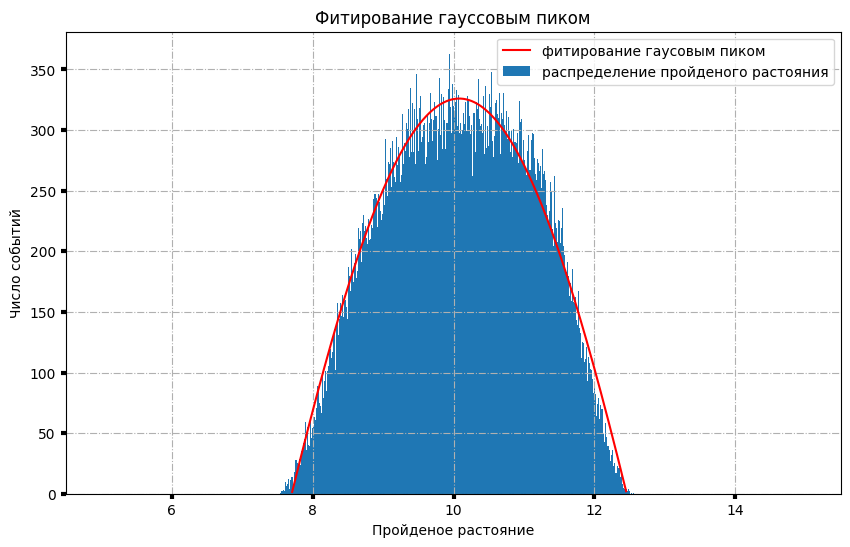

In [ ]:
xx = []
yy = []
for i in range(i_min, i_max):
    if gauss(l[i], args[0], args[1], args[2], args[3]) > 0:
      xx.append(l[i])
      yy.append(gauss(l[i], args[0], args[1], args[2], args[3]))

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Фитирование гауссовым пиком')
ax.set_xlabel('Пройденое растояние')
ax.set_ylabel('Число событий')
ax.grid(True, linestyle='-.')
ax.tick_params(labelsize='medium', width=3)


ax.bar(l, data, linewidth = 1., width = err, label = "распределение пройденого растояния")
ax.plot(xx, yy, color='r', label = "фитирование гаусовым пиком")
ax.legend()
pyplot.show()

In [ ]:
#Фитирование асимметричным гаусовым пиком
def gauss_as(x, a, b, c, d, f):
    return a* np.exp(-(x-b)**2/c)*(1+erf(f*x))+d
    # a*np.exp(-(x-b)**2 /c1)+d
args, covar = curve_fit(gauss_as, l[i_min:i_max], data[i_min:i_max], [300000.0,11.0, 100.0,0.0, -0.01])
perr = np.sqrt(np.diag(covar))

# Подсчёт хи квадрата
chisq=0
for i in range(i_min, i_max):
    if data[i]>0:
        chisq += (data[i] - gauss_as(l[i], *args))**2/ data[i]
    else:
        chisq += (data[i] - gauss_as(l[i], *args))**2
print("Результаты фитирования гауссом: ", args, " и их ошибка", perr)
print("Хи квадрат: ",chisq)
print("Уделёный на число степеней свобод: ", chisq/(i_max - i_min - 5))

Результаты фитирования гауссом:  [1.02158303e+06 2.09082290e+02 1.02019217e+03 2.01199219e+02
 2.80789438e-01]  и их ошибка [inf inf inf inf inf]
Хи квадрат:  423819.6429747985
Уделёный на число степеней свобод:  861.4220385666637


<ipython-input-198-b6c9df1f88cb>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  args, covar = curve_fit(gauss_as, l[i_min:i_max], data[i_min:i_max], [300000.0,11.0, 100.0,0.0, -0.01])


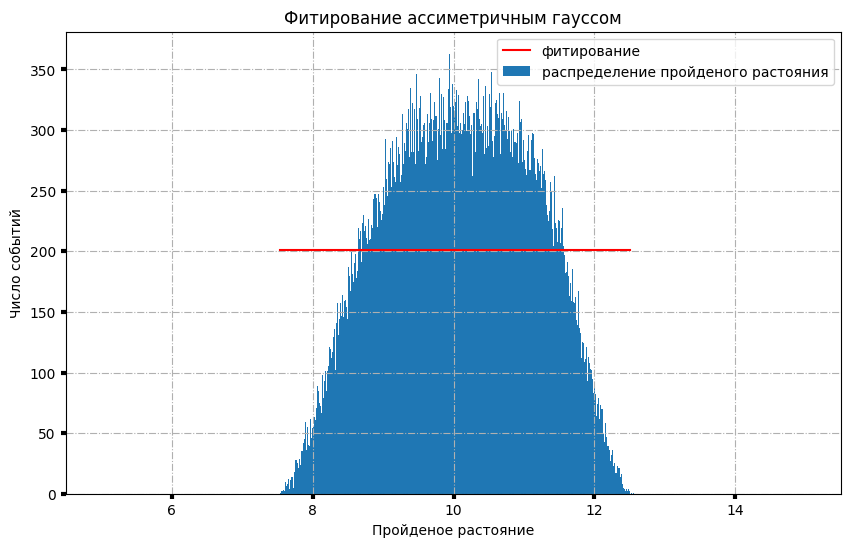

In [ ]:
xxx = []
yyy = []
for i in range(i_min, i_max):
    if gauss_as(l[i], args[0], args[1], args[2], args[3], args[4]) > 0:
      xxx.append(l[i])
      yyy.append(gauss_as(l[i], args[0], args[1], args[2], args[3], args[4]))

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Фитирование ассиметричным гауссом')
ax.set_xlabel('Пройденое растояние')
ax.set_ylabel('Число событий')
ax.grid(True, linestyle='-.')
ax.tick_params(labelsize='medium', width=3)


ax.bar(l, data, linewidth = 1., width = err, label = "распределение пройденого растояния")
ax.plot(xxx, yyy, color='r', label = "фитирование")
ax.legend()
pyplot.show()

In [ ]:
#Фитирование гаусовым пиком
def gauss_log(x, a, b, c, d):
    return a/x* np.exp(-(np.log(x) + b)**2/c) + d
args, covar = curve_fit(gauss_log, l[i_min:i_max], data[i_min:i_max], [300000.0,-2.1, 1.0, 0.0])
perr = np.sqrt(np.diag(covar))
args, perr

(array([ 6.49957836e+03, -2.33902224e+00,  8.57479305e-02, -3.11584077e+02]),
 array([5.18881181e+02, 4.49551241e-03, 9.28811354e-03, 5.08728727e+01]))

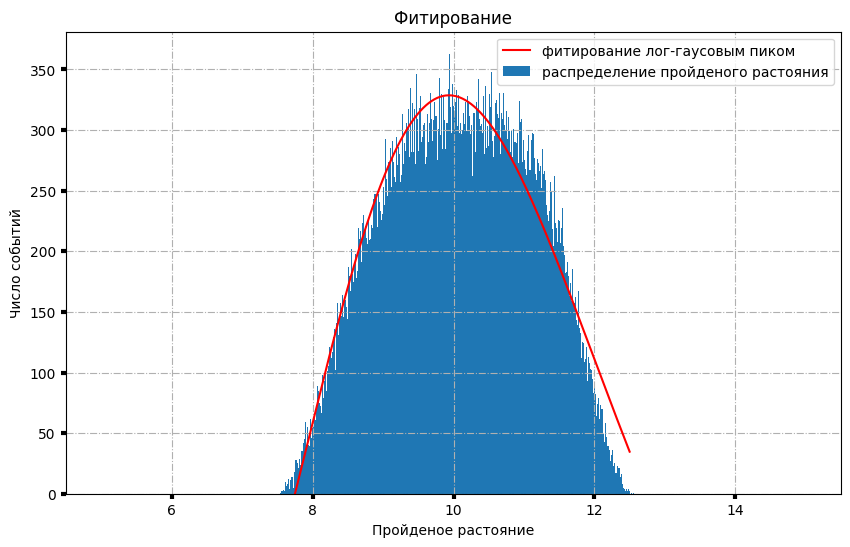

In [ ]:
xx = []
yy = []
for i in range(i_min, i_max):
    if gauss_log(l[i], args[0], args[1], args[2], args[3]) > 0:
      xx.append(l[i])
      yy.append(gauss_log(l[i], args[0], args[1], args[2], args[3]))

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Фитирование')
ax.set_xlabel('Пройденое растояние')
ax.set_ylabel('Число событий')
ax.grid(True, linestyle='-.')
ax.tick_params(labelsize='medium', width=3)


ax.bar(l, data, linewidth = 1., width = err, label = "распределение пройденого растояния")
ax.plot(xx, yy, color='r', label = "фитирование лог-гаусовым пиком")
ax.legend()
pyplot.show()

### Полиномы

In [ ]:
#Фитирование полиномом
def pol_6(x, a, b, c, d, f, g, h):
    return a+b*x+c*x**2+d*x**3+f*x**4+g*x**5+h*x**6
def pol_3(x, a, b, c, d):
    return a+b*x+c*x**2+d*x**3

args_6, covar_6 = curve_fit(pol_6, l[i_min:i_max], data[i_min:i_max], absolute_sigma=True)
perr_6 = np.sqrt(np.diag(covar_6))
print("6: ", args_6, perr_6)
args_3, covar_3 = curve_fit(pol_3, l[i_min:i_max], data[i_min:i_max], absolute_sigma=True)
perr_3 = np.sqrt(np.diag(covar_3))
print("3: ", args_3, perr_3)

# Подсчёт хи квадрата
print("не нулевых бинов=", i_max - i_min)

chisq = 0
for i in range(i_min, i_max):
    r = data[i] - pol_6(l[i], *args_6)
    chisq += r**2/ data[i]
print("chisq =",chisq)
print(chisq/(i_max - i_min - 7))

6:  [ 2.01584914e+06 -1.24067403e+06  3.16175312e+05 -4.27247710e+04
  3.22998561e+03 -1.29552224e+02  2.15381067e+00] [9.27490201e+03 5.70194667e+03 1.45270209e+03 1.96333965e+02
 1.48465957e+01 5.95630837e-01 9.90540894e-03]
3:  [-2522.18182328   232.37718345    36.76542086    -3.15761653] [18.88866373  5.77285095  0.58171994  0.01933498]
не нулевых бинов= 497
chisq = 837.7982789852894
1.7097924060924272


power =  6
 args =  [ 2.01581016e+06 -1.24064767e+06  3.16167991e+05 -4.27237005e+04
  3.22989863e+03 -1.29548497e+02  2.15374485e+00]
 chi sq = 837.9232176461907
  1.7100473829514096


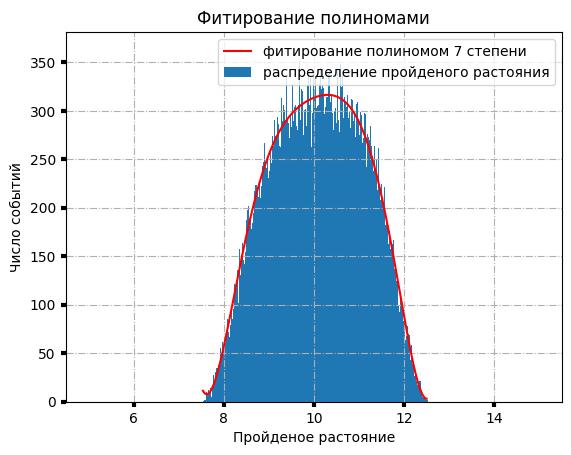

power =  7
 args =  [ 9.70995343e+04  1.40665301e+05 -1.07904743e+05  2.92487830e+04
 -4.06313065e+03  3.11700672e+02 -1.26065408e+01  2.10603239e-01]
 chi sq = 688.9638235029938
  1.40892397444375


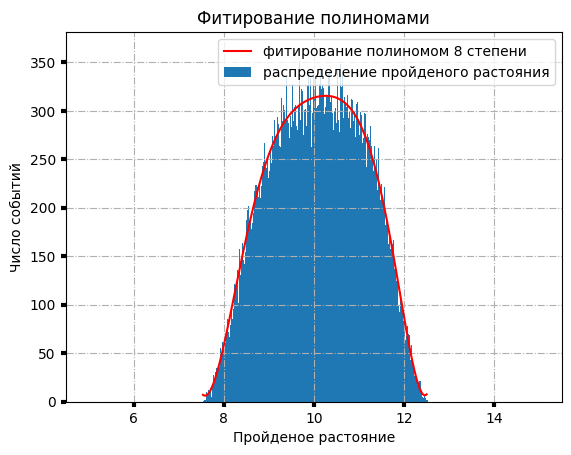

power =  8
 args =  [-9.90400920e+05  9.25610473e+05 -3.49911671e+05  7.06036555e+04
 -8.30146685e+03  5.73349359e+02 -2.17276651e+01  3.57078116e-01
 -4.12621082e-04]
 chi sq = 660.5461230076047
  1.3535781209172228


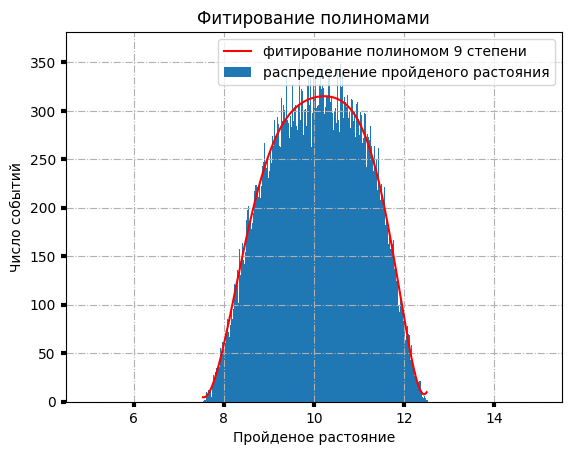

power =  9
 args =  [-6.16199410e+06  4.87148421e+06 -1.61975935e+06  2.89835511e+05
 -2.89958264e+04  1.37520549e+03  1.15229988e+01 -4.83235030e+00
  2.23475223e-01 -3.52141305e-03]
 chi sq = 586.3248997549551
  1.2039525662319408


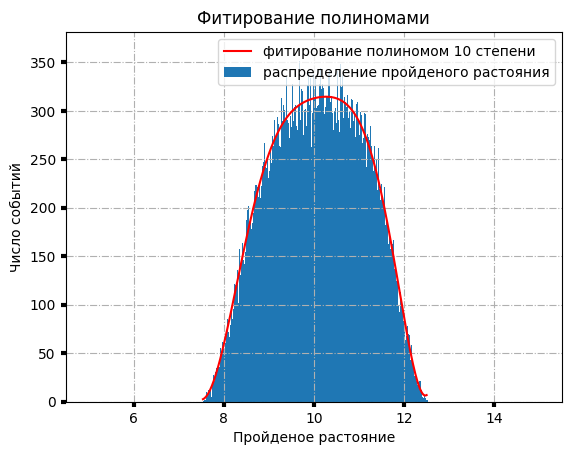

power =  10
 args =  [-6.47356960e+06  4.94804062e+06 -1.57745440e+06  2.66605410e+05
 -2.44320714e+04  9.66349258e+02  1.72620610e+01 -2.59467604e+00
  9.14892612e-03  4.85260412e-03 -1.26350311e-04]
 chi sq = 571.8754559502892
  1.1766984690335167


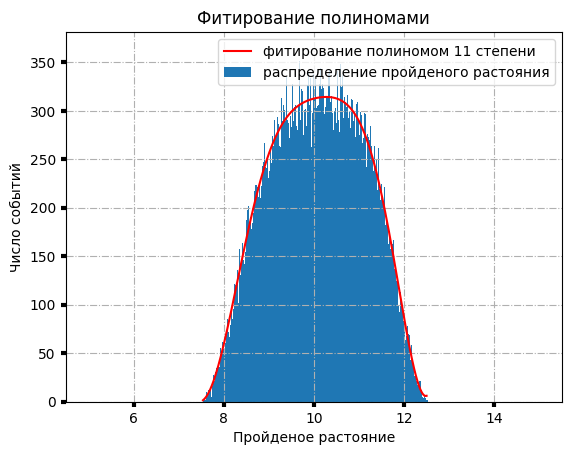

power =  11
 args =  [-6.46762916e+06  4.94555026e+06 -1.57721836e+06  2.66640683e+05
 -2.44394956e+04  9.66498845e+02  1.73084772e+01 -2.59779211e+00
  9.25010309e-03  4.83626867e-03 -1.24962163e-04 -3.55108343e-08]
 chi sq = 570.9180910519249
  1.1771507031998452


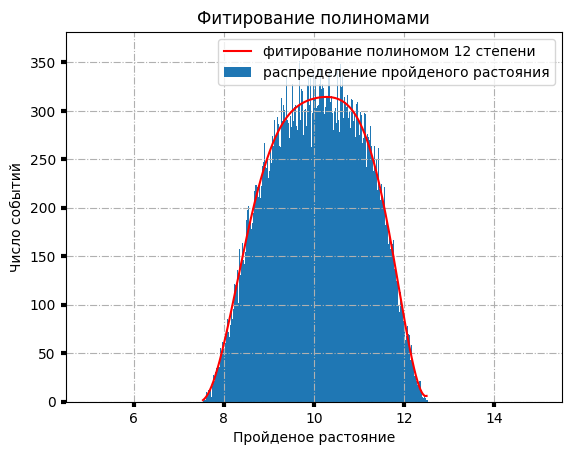

power =  12
 args =  [-5.74045164e+06  4.29299741e+06 -1.33312022e+06  2.17649411e+05
 -1.88278823e+04  6.06338768e+02  3.06417638e+01 -3.16896547e+00
  2.21101817e-02  1.10233323e-02 -9.16965087e-04  3.75122860e-05
 -6.49690416e-07]
 chi sq = 560.5207445053381
  1.1581007117878888


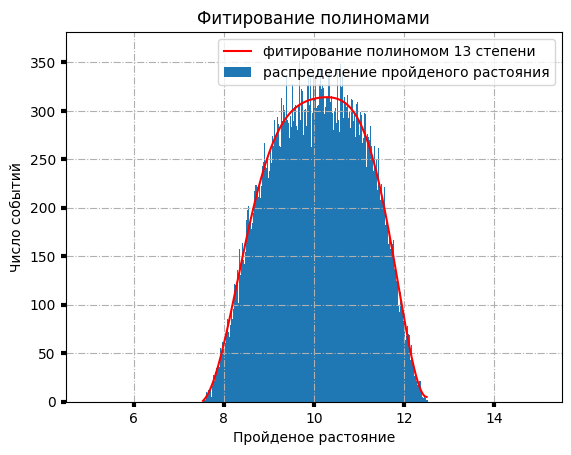

power =  13
 args =  [-5.19900831e+06  4.34218016e+06 -1.52782628e+06  2.85400375e+05
 -2.76251135e+04  6.50739392e+02  1.36173725e+02 -1.20215950e+01
 -1.09814022e-01  5.19667581e-02 -3.60428164e-04 -2.48796710e-04
  1.44951105e-05 -2.61731934e-07]
 chi sq = 554.6382232787475
  1.1483193028545498


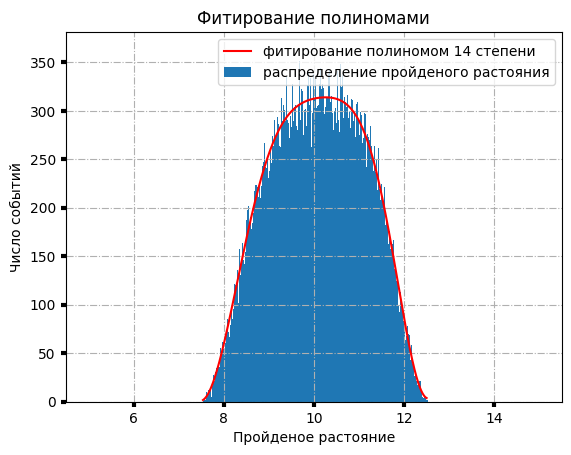

power =  14
 args =  [-5.21887855e+06  4.35141793e+06 -1.52909150e+06  2.85394929e+05
 -2.76174206e+04  6.51859127e+02  1.36011945e+02 -1.20300149e+01
 -1.08201535e-01  5.19341705e-02 -3.58867705e-04 -2.49256896e-04
  1.45045281e-05 -2.60306105e-07 -5.38760265e-11]
 chi sq = 553.6976677098774
  1.1487503479458037


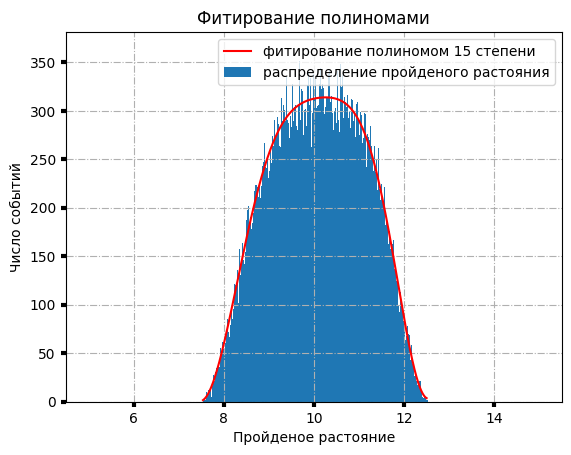

power =  15
 args =  [-2.99601339e+06  3.12296433e+06 -1.31417987e+06  2.85366688e+05
 -3.18407322e+04  1.08054405e+03  1.31821864e+02 -1.27192443e+01
 -1.52452785e-01  5.09307665e-02 -1.89032024e-06 -1.75036308e-04
  6.14911633e-06 -2.17677337e-07  1.99021909e-08 -5.84038162e-10]
 chi sq = 561.9843693467828
  1.1683666722386337


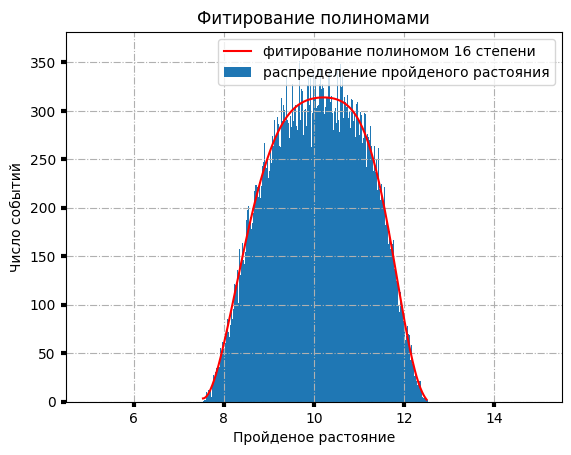

power =  16
 args =  [-2.96916564e+06  3.06776259e+06 -1.27095285e+06  2.70310859e+05
 -2.94251926e+04  9.75017582e+02  1.13484967e+02 -1.04203181e+01
 -1.89891747e-01  4.85463368e-02 -3.76576953e-06 -2.58069587e-04
  1.55565920e-05  1.67913569e-07 -8.39035418e-08  4.98946166e-09
 -1.00271956e-10]
 chi sq = 567.6972615121888
  1.1827026281503934


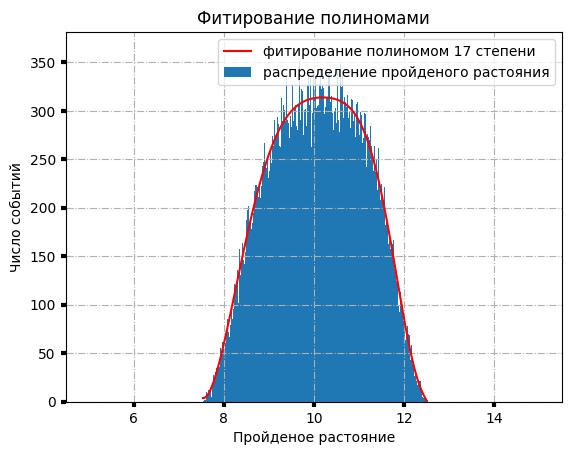

power =  17
 args =  [-2.96915478e+06  3.06776722e+06 -1.27095419e+06  2.70310755e+05
 -2.94251745e+04  9.75019842e+02  1.13485044e+02 -1.04203361e+01
 -1.89896498e-01  4.85456978e-02 -3.59037154e-06 -2.58074233e-04
  1.55563019e-05  1.67901026e-07 -8.39033247e-08  4.98954046e-09
 -1.00265794e-10 -4.44610326e-16]
 chi sq = 567.9037015664838
  1.185602717257795


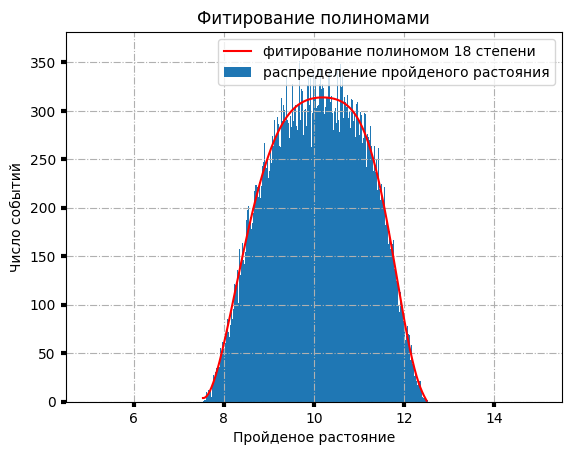

power =  18
 args =  [-3.33775045e+06  3.17959255e+06 -1.25677423e+06  2.66363340e+05
 -3.17998095e+04  1.89735002e+03 -1.57818839e+01 -2.07070043e+00
 -4.57572157e-01  6.05488701e-02  1.09422911e-09 -3.70205199e-04
  1.65408044e-05  1.48312501e-07  7.30739067e-08 -1.20354925e-08
  4.66459359e-10  1.84095316e-12 -3.07460460e-13]
 chi sq = 576.0880292646202
  1.205205082143557


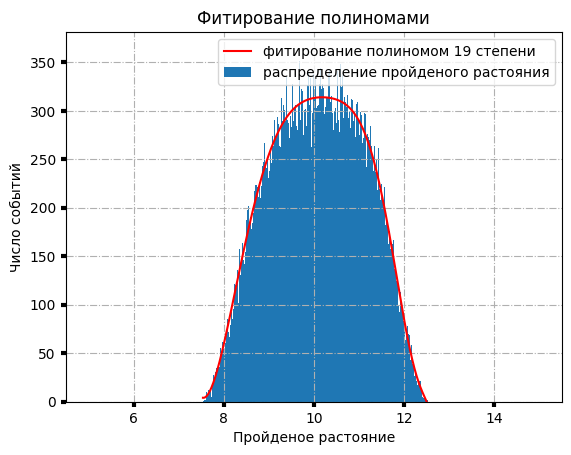

In [ ]:
a_zero = args_6
for i_pow in range(7, 20):
    def pol(x, *a):
        s = a[0]
        for i in range(1, i_pow):
            s+=a[i]*(x**i)
        return s
    args, covar = curve_fit(pol, l[i_min:i_max], data[i_min:i_max], a_zero, absolute_sigma=True)

    a_zero = np.append(args, 0.0)

    perr = np.sqrt(np.diag(covar))
    print("power = ", i_pow-1)
    print(" args = ", args)

    # Подсчёт хи квадрата
    chisq=0
    for i in range(i_min, i_max):
        if data[i]>0:
          chisq += (data[i] - pol(l[i], *args))**2/ data[i]
        else:
          chisq += (data[i] - pol(l[i], *args))**2
    print(" chi sq =",chisq)
    print(" ", chisq/(i_max - i_min - i_pow))

    #Отрисовка
    x = []
    y = []
    for i in range(i_min, i_max):
        if pol(l[i], *args) > 0:
          x.append(l[i])
          y.append(pol(l[i], *args))

    fig, ax = plt.subplots()
    ax.set_xlabel('Пройденое растояние')
    ax.set_ylabel('Число событий')
    ax.grid(True, linestyle='-.')
    ax.tick_params(labelsize='medium', width=3)

    ax.bar(l, data, linewidth = 1., width = err, label = "распределение пройденого растояния")
    ax.plot(x, y, color='r', label = "фитирование полиномом "+str(i_pow-1)+ " степени")
    ax.legend()
    pyplot.show()


<ipython-input-180-65b1da2d00a2>:9: OptimizeWarning: Covariance of the parameters could not be estimated
  args, covar = curve_fit(pol_exp, l[i_min:i_max], data[i_min:i_max], a_zero, absolute_sigma=True)


power =  6
 args =  [-7.97303818e-01  1.15218854e+08 -2.11510239e+07  6.22120883e+06
 -7.70744079e+05  4.51786025e+04 -1.03081847e+03  2.15381067e+00]
 chi sq = 3102.307576771281
  6.318345370206275


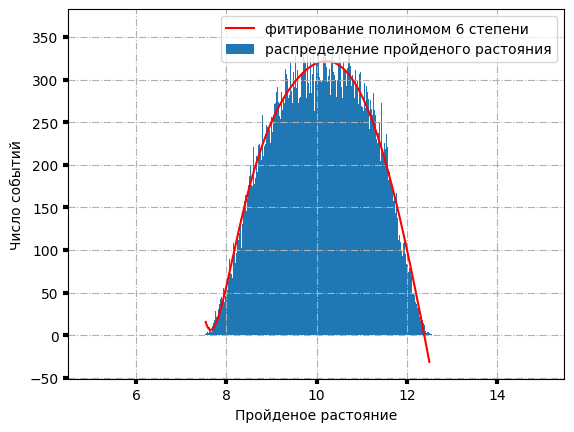

power =  7
 args =  [ 3.70994679e-02  2.03887126e+05 -4.50619837e+04  1.52481703e+04
 -2.30739961e+03  1.85158607e+02 -7.69712951e+00  1.30962226e-01
  0.00000000e+00]
 chi sq = 683.9586437799505
  1.3958339668978583


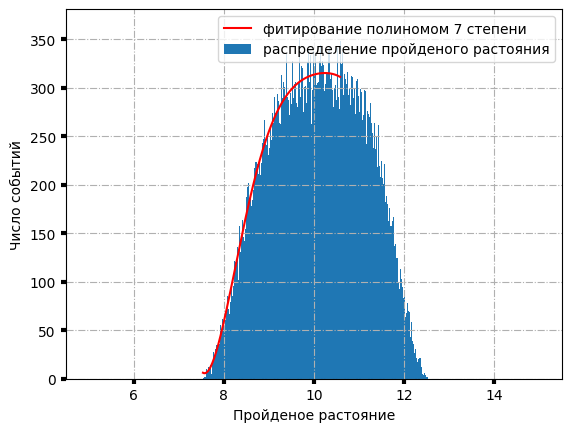

power =  8
 args =  [ 4.15722213e-02  1.98129153e+05 -4.40164032e+04  1.49568535e+04
 -2.27765363e+03  1.84706807e+02 -7.84044000e+00  1.41717832e-01
 -2.40180916e-04  0.00000000e+00]
 chi sq = 682.3029258493987
  1.395302506849486


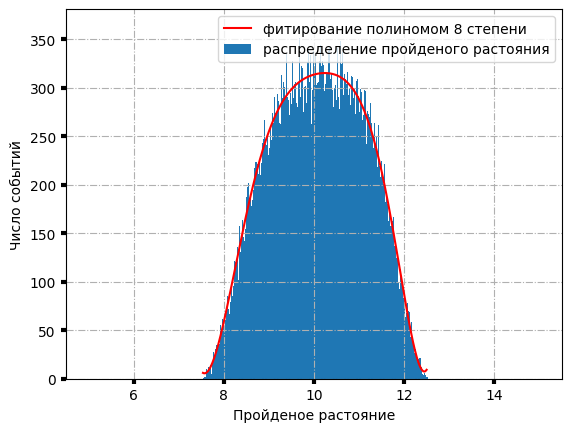

power =  9
 args =  [ 1.08324291e-01  1.60525206e+05 -3.85132597e+04  1.37472501e+04
 -2.21575242e+03  1.90693426e+02 -8.33321883e+00  1.05250127e-01
  4.36982424e-03 -1.24426489e-04  0.00000000e+00]
 chi sq = 681.1102280335779
  1.395717680396676


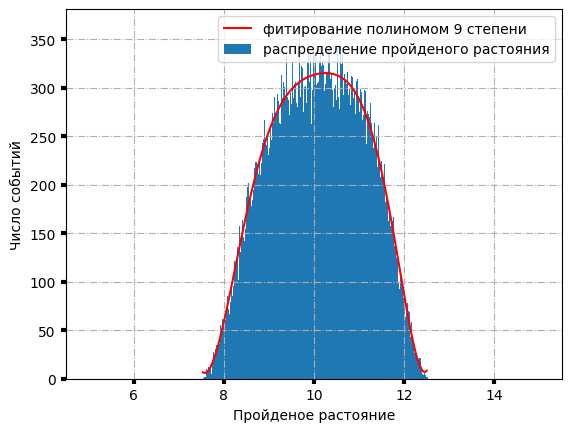

power =  10
 args =  [ 1.35203806e-01  1.43410399e+05 -3.54284893e+04  1.29058690e+04
 -2.13582482e+03  1.90573612e+02 -8.79500105e+00  1.26091054e-01
  5.14094216e-03 -1.99743057e-04  1.42769926e-06  0.00000000e+00]
 chi sq = 677.0283719240048
  1.390201995737176


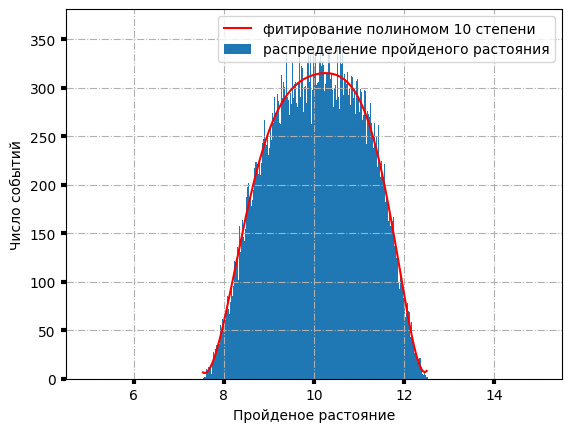

power =  11
 args =  [ 1.33945672e-01  1.43458634e+05 -3.53722387e+04  1.28748763e+04
 -2.13013116e+03  1.90315824e+02 -8.83597897e+00  1.30370646e-01
  5.30676197e-03 -2.42785566e-04  3.72348783e-06 -4.15277417e-08
  0.00000000e+00]
 chi sq = 676.5756355815024
  1.3921309374104989


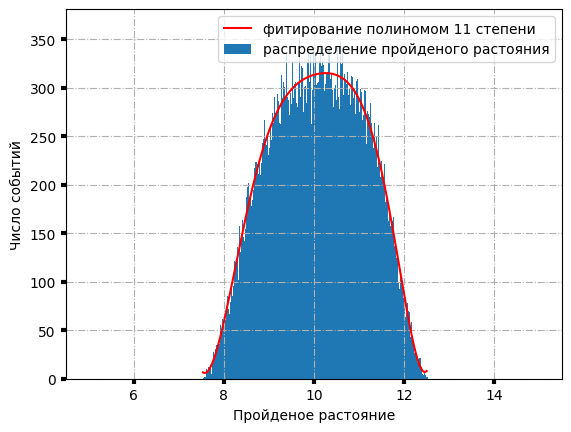

power =  12
 args =  [ 1.92873988e-01  1.01709657e+05 -2.73650924e+04  1.06509405e+04
 -1.92632942e+03  1.92723786e+02 -1.00612079e+01  1.14050912e-01
  1.38911749e-02 -1.91284419e-04 -5.95866844e-05  3.60249232e-06
 -6.66964973e-08  0.00000000e+00]
 chi sq = 635.7809810160046
  1.310888620651556


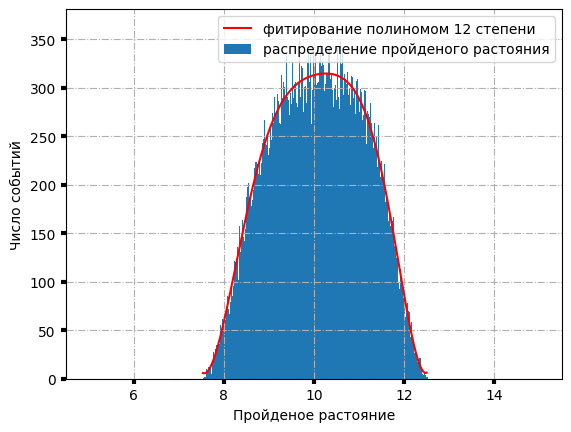

power =  13
 args =  [ 2.16642662e-01  8.79090932e+04 -2.49038881e+04  1.00233392e+04
 -1.88047087e+03  1.94622126e+02 -1.03045395e+01  9.45374524e-02
  1.52010960e-02 -2.56805915e-05 -6.53502870e-05  2.23323780e-06
  3.88388865e-08 -2.22513943e-09  0.00000000e+00]
 chi sq = 604.9610780459022
  1.2499195827394673


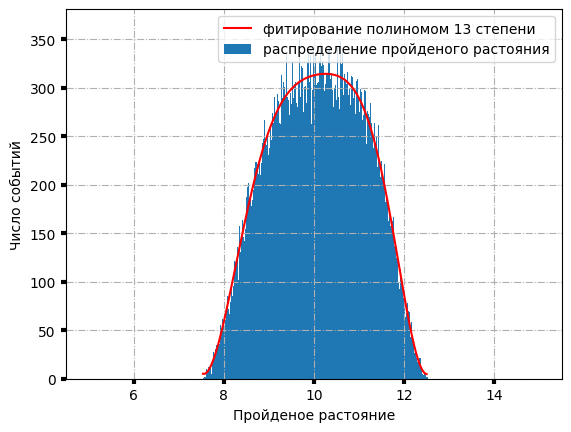

power =  14
 args =  [ 2.09942157e-01  8.72849342e+04 -2.47291023e+04  9.97064901e+03
 -1.87613117e+03  1.94854498e+02 -1.03364636e+01  9.23393812e-02
  1.53773717e-02 -1.63387359e-05 -6.42828990e-05  2.08671322e-06
  2.83957980e-08 -7.80091665e-10 -3.88938095e-11  0.00000000e+00]
 chi sq = 597.5411758759969
  1.2371452916687307


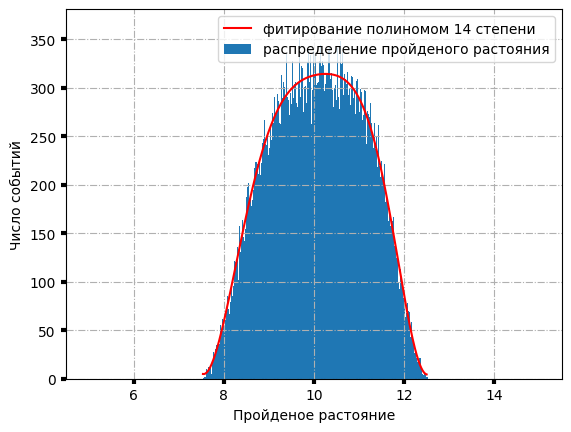

power =  15
 args =  [ 1.88937800e-01  8.70051298e+04 -2.45424239e+04  9.90994999e+03
 -1.87170673e+03  1.95240371e+02 -1.03622059e+01  8.84207686e-02
  1.53214801e-02  1.46502734e-05 -6.23466715e-05  2.02343305e-06
  7.29769399e-09 -1.31650309e-09  1.44776350e-10 -5.92211812e-12
  0.00000000e+00]
 chi sq = 582.3214656329648
  1.2081358208152795


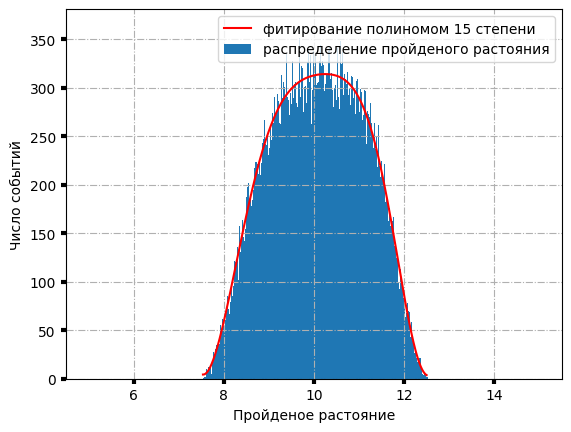

power =  16
 args =  [ 1.96393329e-01  8.31889112e+04 -2.40265830e+04  9.81233128e+03
 -1.86965037e+03  1.95807777e+02 -1.03565122e+01  8.55194469e-02
  1.50840417e-02  1.24286405e-05 -6.01098639e-05  2.16578417e-06
  1.36280784e-09 -2.62735895e-09  1.10110889e-10  5.33602226e-12
 -3.52316980e-13  0.00000000e+00]
 chi sq = 567.6456981596416
  1.1801365866104816


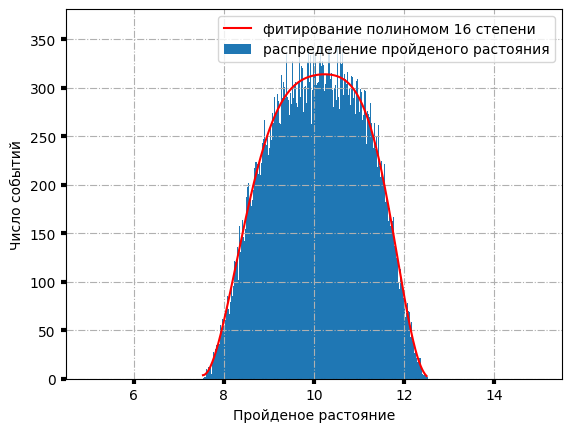

power =  17
 args =  [ 1.92359897e-01  8.28933347e+04 -2.39750200e+04  9.80146777e+03
 -1.86937748e+03  1.95874659e+02 -1.03552960e+01  8.51860698e-02
  1.50594501e-02  7.69026326e-06 -5.96448421e-05  2.20365842e-06
  1.46120613e-09 -2.81965138e-09  8.87449973e-11  5.51088112e-12
 -1.47352642e-13 -7.98474058e-15  0.00000000e+00]
 chi sq = 563.641671634062
  1.1742534825709625


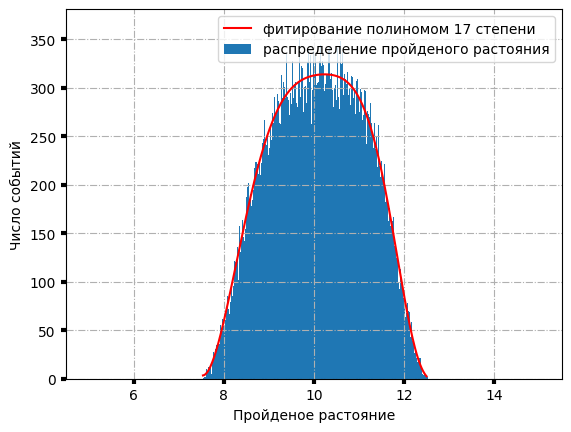

power =  18
 args =  [ 1.92286038e-01  8.20511984e+04 -2.38713759e+04  9.78399604e+03
 -1.86928610e+03  1.95967075e+02 -1.03512006e+01  8.49834663e-02
  1.50057151e-02  4.37066760e-06 -5.95165458e-05  2.23179709e-06
  4.32204470e-09 -2.86716413e-09  7.05490011e-11  4.01492400e-12
 -1.12344913e-13  7.42680154e-15 -6.40304814e-16  0.00000000e+00]
 chi sq = 558.9709339658549
  1.1669539331228704


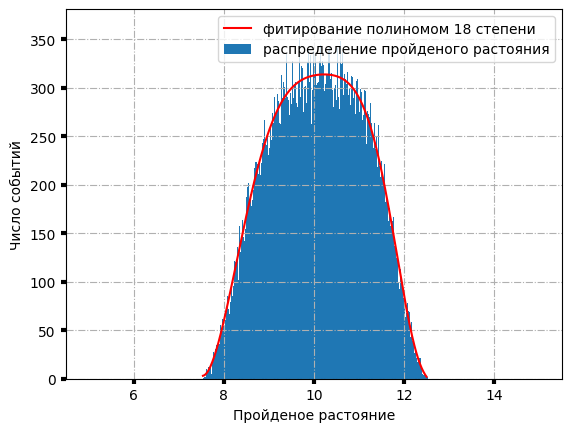

power =  19
 args =  [ 1.88339575e-01  8.21367200e+04 -2.38743210e+04  9.78371164e+03
 -1.86924459e+03  1.95973185e+02 -1.03510689e+01  8.49498974e-02
  1.50030941e-02  3.11971986e-06 -5.94590045e-05  2.23864997e-06
  4.71447780e-09 -2.86445200e-09  6.76029859e-11  3.67136740e-12
 -1.26439974e-13  9.06168237e-15 -3.71621762e-16 -1.47180745e-17
  0.00000000e+00]
 chi sq = 557.356434154774
  1.1660176446752595


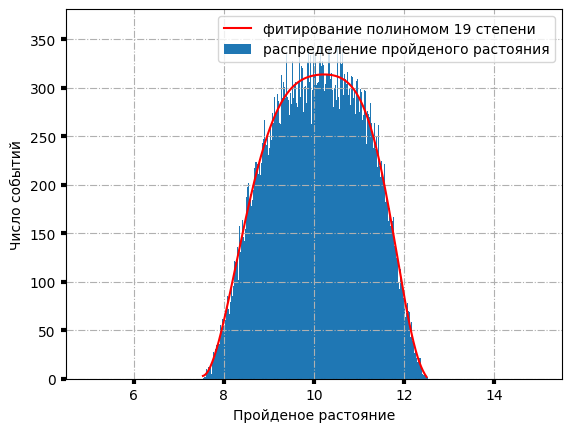

In [ ]:
# Полином с экспанентой
a_zero = np.append(0.0, args_6)
for i_pow in range(6, 20):
    def pol_exp(x, *a):
        s = a[1]
        for i in range(2, i_pow+1):
            s+=a[i]*(x**i)
        return s*np.exp(x*a[0])
    args, covar = curve_fit(pol_exp, l[i_min:i_max], data[i_min:i_max], a_zero, absolute_sigma=True)

    a_zero = np.append(args, 0.0)

    perr = np.sqrt(np.diag(covar))
    print("power = ", i_pow)
    print(" args = ", args)

    # Подсчёт хи квадрата
    chisq=0
    for i in range(i_min, i_max):
        if data[i]>0:
          chisq += (data[i] - pol_exp(l[i], *args))**2/ data[i]
        else:
          chisq += (data[i] - pol_exp(l[i], *args))**2
    print(" chi sq =",chisq)
    print(" ", chisq/(i_max - i_min - i_pow))

    #Отрисовка
    x = []
    y = []
    for i in range(i_min, i_max):
        if pol(l[i], *args) > 0:
          x.append(l[i])
          y.append(pol_exp(l[i], *args))

    fig, ax = plt.subplots()
    ax.set_xlabel('Пройденое растояние')
    ax.set_ylabel('Число событий')
    ax.grid(True, linestyle='-.')
    ax.tick_params(labelsize='medium', width=3)

    ax.bar(l, data, linewidth = 1., width = err, label = "распределение пройденого растояния")
    ax.plot(x, y, color='r', label = "фитирование полиномом "+str(i_pow)+ " степени")
    ax.legend()
    pyplot.show()